# Unzip the zip file

In [4]:
!unzip '/content/archive (28).zip'


Archive:  /content/archive (28).zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


# ML Model

# Load the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [6]:
data = pd.read_csv('/content/twitter_training.csv')

In [7]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Renaming the columns

In [10]:
data.columns = ['tweet_id','entity','sentiment','TweetContent']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      74681 non-null  int64 
 1   entity        74681 non-null  object
 2   sentiment     74681 non-null  object
 3   TweetContent  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Missing value imputation

In [12]:
data['TweetContent'] = np.where(data['TweetContent'].isna(),data['TweetContent'].mode(dropna=True)[0],data['TweetContent'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      74681 non-null  int64 
 1   entity        74681 non-null  object
 2   sentiment     74681 non-null  object
 3   TweetContent  74681 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


<Axes: xlabel='sentiment'>

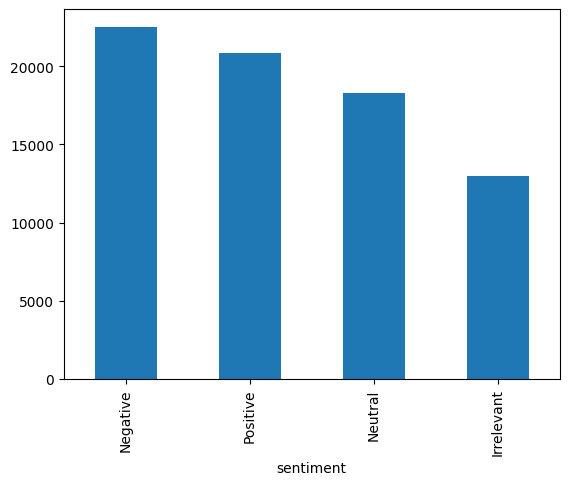

In [14]:
data['sentiment'].value_counts().plot(kind='bar')

In [15]:
data.drop(['tweet_id','entity'],axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentiment     74681 non-null  object
 1   TweetContent  74681 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


# Data Preparation

In [17]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [19]:
def data_prep(text):
  text = re.sub('^a-zA-Z','',text)             # remove non alphabetic characters
  text = text.lower()                          # convert it to lowercase
  text = word_tokenize(text)                   # tokenize
  lemmatizer = WordNetLemmatizer()             # Declare lemmatizer
  text = [lemmatizer.lemmatize(word) for word in text]     # Lemmatize every word
  text = [word for word in text if word not in stopwords.words('english')]    #Remove stop words
  text = ' '.join(text)                        # Make the words as a string again
  return text

In [20]:
data['TweetContent'].apply(data_prep)


,TweetContent
0,"coming border kill ,"
1,"im getting borderland kill ,"
2,"im coming borderland murder ,"
3,"im getting borderland 2 murder ,"
4,"im getting borderland murder ,"
...,...
74676,realized window partition mac like 6 year behi...
74677,realized mac window partition 6 year behind nv...
74678,realized window partition mac 6 year behind nv...
74679,realized window partition mac like 6 year behi...


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentiment     74681 non-null  object
 1   TweetContent  74681 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


# Tfidf Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vect = TfidfVectorizer()

In [24]:
x = vect.fit_transform(data['TweetContent'])

In [25]:
y = data['sentiment']

In [26]:
x.shape


(74681, 31062)

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 123)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(59744, 31062)
(14937, 31062)
(59744,)
(14937,)


# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [33]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  acc_score = accuracy_score(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('The Accuracy of the model is: ', round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [34]:
model_eval(y_train,y_hat_train_dtree)

The Accuracy of the model is:  0.97
[[10003    60   224    74]
 [   12 17592   372   124]
 [   12    87 14462   107]
 [   38   127   338 16112]]
              precision    recall  f1-score   support

  Irrelevant       0.99      0.97      0.98     10361
    Negative       0.98      0.97      0.98     18100
     Neutral       0.94      0.99      0.96     14668
    Positive       0.98      0.97      0.98     16615

    accuracy                           0.97     59744
   macro avg       0.97      0.97      0.97     59744
weighted avg       0.97      0.97      0.97     59744



In [35]:
model_eval(y_train,y_hat_train_dtree)

The Accuracy of the model is:  0.97
[[10003    60   224    74]
 [   12 17592   372   124]
 [   12    87 14462   107]
 [   38   127   338 16112]]
              precision    recall  f1-score   support

  Irrelevant       0.99      0.97      0.98     10361
    Negative       0.98      0.97      0.98     18100
     Neutral       0.94      0.99      0.96     14668
    Positive       0.98      0.97      0.98     16615

    accuracy                           0.97     59744
   macro avg       0.97      0.97      0.97     59744
weighted avg       0.97      0.97      0.97     59744



Create an app

In [36]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [37]:
import gradio as gr


In [38]:
def pred_sentiment(TweetContent):
  text_cleaned = data_prep('TweetContent')
  text_vectorized = vect.transform([text_cleaned])
  prediction = dtree.predict(text_vectorized)
  if prediction == 'Positive':
    return 'Positive'
  elif prediction == 'Negative':
    return 'Negtive'
  elif prediction == 'Neutral':
    return 'Neutral'
  else:
    return 'Irrelevant'

In [39]:
iface = gr.Interface(
    fn = pred_sentiment , inputs = gr.Textbox(lines = 5 , label = "Enter your text message here"),outputs="text",
    title = "Sentiment Detection App", description = "Enter a text message to analyze its sentiment"
)
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ccb9838080feca8395.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# RNN Model

In [40]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,SimpleRNN,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentiment     74681 non-null  object
 1   TweetContent  74681 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [42]:
max_words = 69490                     # vocab size we want
tokens = Tokenizer(num_words = max_words)     # create a tokenizer instance
tokens.fit_on_texts(data['TweetContent'])     # tokenizes the words (breaks sentences into individual words)
sequences = tokens.texts_to_sequences(data['TweetContent'])     # creates a sequence

In [43]:
len(tokens.word_index)

33783

In [44]:
sequences

[[2, 120, 404, 3, 1, 6744, 4, 2, 52, 434, 12, 27],
 [307, 174, 13, 140, 4, 2, 52, 434, 12, 27],
 [307, 404, 13, 140, 4, 2, 52, 1793, 12, 27],
 [307, 174, 13, 140, 33, 4, 2, 52, 1793, 12, 21, 27],
 [307, 174, 194, 140, 4, 2, 49, 1793, 12, 27],
 [19,
  2,
  885,
  5,
  373,
  353,
  320,
  232,
  9,
  136,
  43,
  12,
  126,
  122,
  2,
  120,
  5,
  457,
  140,
  543,
  4,
  4209,
  7,
  44,
  6,
  14,
  321,
  752,
  19,
  2,
  786,
  3,
  128,
  497,
  5,
  6154,
  9,
  14,
  272,
  139,
  7,
  1,
  743,
  1899,
  5145,
  1,
  9485,
  2,
  217,
  411,
  35,
  36,
  16,
  18781],
 [19,
  2,
  885,
  5,
  1019,
  6,
  353,
  288,
  232,
  9,
  136,
  43,
  12,
  126,
  122,
  15,
  59,
  5,
  457,
  140,
  543,
  4,
  4209,
  7,
  44,
  6,
  14,
  321,
  752,
  2,
  786,
  3,
  128,
  5,
  6154,
  9,
  14,
  272,
  1084,
  1,
  743,
  1295,
  1807,
  3,
  1,
  9485,
  2,
  217,
  22,
  136,
  35,
  36,
  16,
  18781],
 [19,
  2,
  885,
  5,
  373,
  353,
  288,
  232,
  9,
  136,
  43,


In [45]:
len(sequences)

74681

Padding

In [46]:
max_length = 100
x = pad_sequences(sequences,maxlen = max_length)

In [47]:
x.shape

(74681, 100)

Split the data into train and test

In [48]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 123)

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(59744, 100)
(14937, 100)
(59744,)
(14937,)


Model

In [50]:
y_train = [0 if label == 'Positive' else 1 if label == 'Negative' else 2 if label == 'Neutral' else 3 for label in y_train]
y_test = [0 if label == 'Positive' else 1 if label == 'Negative' else 2 if label == 'Neutral' else 3 for label in y_test]


In [51]:
from keras.utils import to_categorical

In [52]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [53]:
model = Sequential()
model.add(Embedding(input_dim = max_words , output_dim = 100 , input_length = 100))
model.add(SimpleRNN(units=64))
model.add(Dense(units = 4 , activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compile the model

In [54]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

Fit the moodel

In [55]:
hist = model.fit(x_train , y_train , epochs = 10 , batch_size = 32 , validation_data = (x_test , y_test))

Epoch 1/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 179s 92ms/step - accuracy: 0.5453 - loss: 1.0558 - val_accuracy: 0.8351 - val_loss: 0.4530
Epoch 2/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 196s 89ms/step - accuracy: 0.9125 - loss: 0.2472 - val_accuracy: 0.8525 - val_loss: 0.4130
Epoch 3/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 206s 91ms/step - accuracy: 0.9438 - loss: 0.1516 - val_accuracy: 0.8391 - val_loss: 0.4864
Epoch 4/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 201s 91ms/step - accuracy: 0.9537 - loss: 0.1217 - val_accuracy: 0.8493 - val_loss: 0.4837
Epoch 5/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 202s 91ms/step - accuracy: 0.9607 - loss: 0.0983 - val_accuracy: 0.8514 - val_loss: 0.5103
Epoch 6/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 227s 104ms/step - accuracy: 0.9526 - loss: 0.1211 - val_accuracy: 0.8412 - val_loss: 0.5210
Epoch 7/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 192s 99ms/step - accuracy: 0.9337 - loss: 0.1708 - val_accuracy: 0.8395 - val_loss: 0.5775
Epoch 8/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 167s 89ms/step - accuracy:

In [56]:
y_hat_train = np.argmax(model.predict(x_train), axis=1)
y_hat_test = np.argmax(model.predict(x_test), axis=1)

1867/1867 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [57]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [62]:
y_train

array([2, 0, 3, ..., 0, 1, 3])

In [58]:
model_eval(y_train,y_hat_train)

The Accuracy of the model is:  0.97
[[15952    89   544    30]
 [   86 17413   559    42]
 [   35    77 14533    23]
 [   92    66   337  9866]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     16615
           1       0.99      0.96      0.97     18100
           2       0.91      0.99      0.95     14668
           3       0.99      0.95      0.97     10361

    accuracy                           0.97     59744
   macro avg       0.97      0.97      0.97     59744
weighted avg       0.97      0.97      0.97     59744



In [59]:
model_eval(y_test , y_hat_test)

The Accuracy of the model is:  0.84
[[3566  241  291  118]
 [ 220 3760  313  149]
 [ 247  184 3066  153]
 [ 210  131  194 2094]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4216
           1       0.87      0.85      0.86      4442
           2       0.79      0.84      0.82      3650
           3       0.83      0.80      0.81      2629

    accuracy                           0.84     14937
   macro avg       0.83      0.83      0.83     14937
weighted avg       0.84      0.84      0.84     14937



In [64]:
import gradio as gr

def predict_spam_rnn(TweetContent):
  sequence = tokens.texts_to_sequences([TweetContent])
  padded_sequence = pad_sequences(sequence, maxlen=max_length)
  prediction = np.argmax(model.predict(padded_sequence), axis=1)[0]
  if prediction == 0:
    return 'Positive'
  elif prediction == 1:
    return 'Negtive'
  elif prediction == 2:
    return 'Neutral'
  else:
    return 'Irrelevant'

iface = gr.Interface(
    fn=predict_spam_rnn,
    inputs= gr.Textbox(lines = 5 , label = "Enter your text message here:"),
    outputs="text",
    title = "Spam Detection App (RNN)" ,
    description = "Enter a text message to check if it's spam or ham (using RNN).")
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cb4a05a5105f6aebfc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
